In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

<Axes: xlabel='Date'>

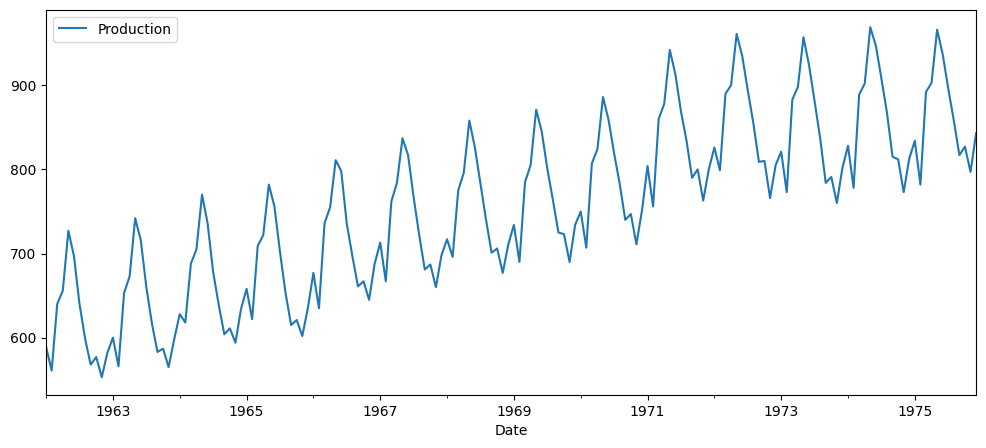

In [ ]:
df.plot(figsize=(12,5))

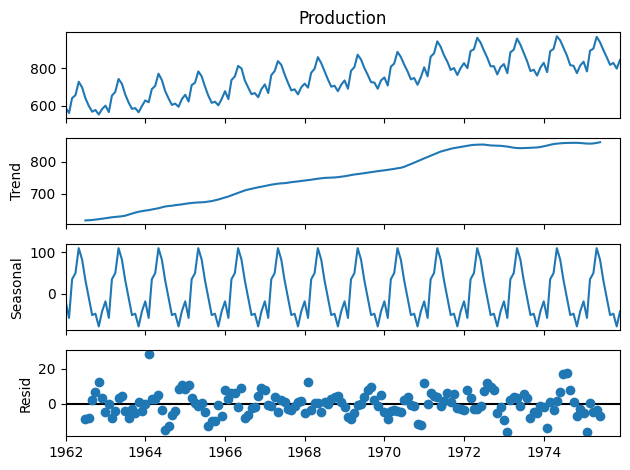

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


results = seasonal_decompose(df['Production'])
results.plot();

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [ ]:
#creating train dataset and test dataset

train = df.iloc[:156]
test = df.iloc[156:]

len(train),len(test)

(156, 12)

In [ ]:
# scailing the dataset

import sklearn.preprocessing
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(train)
scailed_train = scaler.transform(train)
scailed_test = scaler.transform(test)



In [ ]:
scailed_train.shape,scailed_test.shape

((156, 1), (12, 1))

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#converting training dataset for training input shapes

n_inputs = 12
n_features = 1
generator = TimeseriesGenerator(scailed_train, scailed_train,length=n_inputs,batch_size=1)

In [ ]:
import tensorflow as tf

#creating model

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100,activation='relu',input_shape=(n_inputs,n_features)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the model

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(generator,epochs=50, verbose=False)

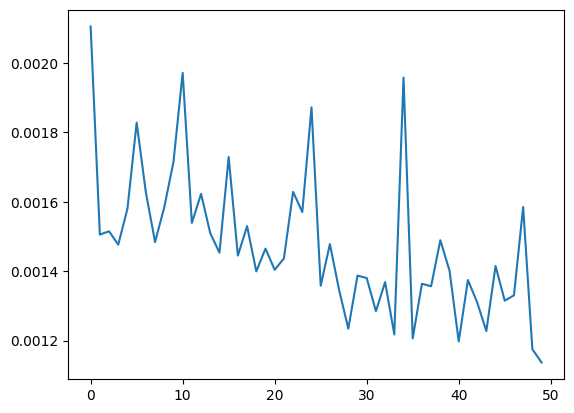

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
#predicting the values
import numpy as np


test_predictions = []

first_eval_batch = scailed_train[-n_inputs:]
current_batch = first_eval_batch.reshape((1, n_inputs, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,818.237585
1975-02-01,782,816.465300
1975-03-01,892,898.039700
1975-04-01,903,935.623354
1975-05-01,966,976.080414


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

<ipython-input-63-df68ac2ffec1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,828.323738
1975-02-01,782,807.490681
1975-03-01,892,895.714300
1975-04-01,903,919.480743
1975-05-01,966,963.068735
